### Codio Activity 16.9: Investigating your own data

For this activity, you are asked to go out and choose a dataset to build a classification model with.  Specifically, you are to compare the `LogisticRegression`, `KNearestNeighborsClassifier`, and `SVC` estimators in terms of performance and speed in model fitting.  You should optimize this model according to what metric you believe is the appropriate one for the task between `precision`, `recall`, or `accuracy`.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config

### Gathering the data

For your dataset, consider using an example dataset from either [kaggle](https://www.kaggle.com/) or the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).  Select an appropriate dataset that is a classification problem.  Download the data file and work in a notebook locally to perform your analysis.  Be sure to grid search different model parameters and compare the different estimators.  Construct a DataFrame of the model results with the following information:

| model | train score | test score | average fit time |
| ----- | -----   | -------   | ------- |
| KNN | ? | ? | ? |
| Logistic Regression | ? | ? | ? |
| SVC | ? | ? | ? |

The assignment will expect a DataFrame with this exact structure and index and column names.  You will be graded based on the exact match of the structure of the DataFrame.  One suggestion is to build a DataFrame and write this out to `.json`, copy and past this below to create the DataFrame.  Alternatively, you can write it out to a `.csv` file and copy the text, or simply hardcode the DataFrame based on your results.

### Problem 1

#### DataFrame of modeling results

Assign your constructed results DataFrame to `results_df` below.  Be sure that the `model` column above is the index of the DataFrame, and the three column names match the order and formatting of the example above.

In [2]:
set_config("figure")

In [3]:
blood = pd.read_csv('data/transfusion.data')
blood

,last,times,unit,since,donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [4]:
blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   last     748 non-null    int64
 1   times    748 non-null    int64
 2   unit     748 non-null    int64
 3   since    748 non-null    int64
 4   donated  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


array([[<AxesSubplot:title={'center':'last'}>,
        <AxesSubplot:title={'center':'times'}>],
       [<AxesSubplot:title={'center':'unit'}>,
        <AxesSubplot:title={'center':'since'}>],
       [<AxesSubplot:title={'center':'donated'}>, <AxesSubplot:>]],
      dtype=object)

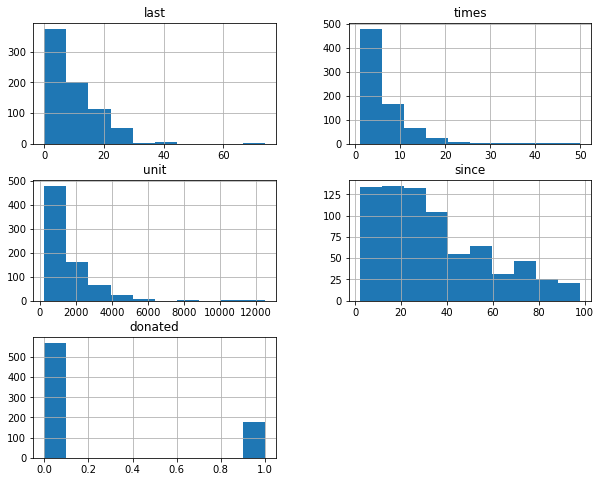

In [5]:
# histograms
blood.hist(figsize = (10, 8))

In [6]:
blood.donated.value_counts(normalize = True)

0    0.762032
1    0.237968
Name: donated, dtype: float64

### Split dataframe

In [7]:
# separate features from target and split training and test datasets
X, y = blood.drop(['unit', 'since', 'donated'], axis = 1), blood.donated
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 93, stratify = y)

## Models

In [8]:
# since there is no aplhanumeric columns, we can just scale and classify data, no transformation needed
# n_neighbors=5 by default!
lgr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()

### GridSearchCV

In [9]:
# set scorer
scorer = 'recall'

In [10]:
%%time
params = {'penalty': ['l1', 'l2'], 'solver':['liblinear']}
lgr_grid = GridSearchCV(lgr, cv = 5, param_grid = params, scoring=scorer).fit(X_train, y_train)
lgr_train = lgr_grid.score(X_train, y_train)
lgr_test = lgr_grid.score(X_test, y_test)
lgr_time = np.mean(lgr_grid.cv_results_['mean_fit_time']) #+ np.mean(lgr_grid.cv_results_['mean_score_time'])

CPU times: user 48.4 ms, sys: 2.23 ms, total: 50.7 ms
Wall time: 48.9 ms


In [11]:
lgr_grid.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

In [12]:
lgr_grid.cv_results_

{'mean_fit_time': array([0.00201077, 0.00190063]),
 'std_fit_time': array([0.00032578, 0.00025343]),
 'mean_score_time': array([0.00168891, 0.00162139]),
 'std_score_time': array([9.36197115e-05, 2.63033508e-05]),
 'param_penalty': masked_array(data=['l1', 'l2'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['liblinear', 'liblinear'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'penalty': 'l1', 'solver': 'liblinear'},
  {'penalty': 'l2', 'solver': 'liblinear'}],
 'split0_test_score': array([0.03703704, 0.03703704]),
 'split1_test_score': array([0.07407407, 0.07407407]),
 'split2_test_score': array([0.11111111, 0.11111111]),
 'split3_test_score': array([0.11538462, 0.11538462]),
 'split4_test_score': array([0.07692308, 0.07692308]),
 'mean_test_score': array([0.08290598, 0.08290598]),
 'std_test_score': array([0.0285242, 0.0285242]),
 'rank_test_score': ar

In [13]:
%%time
params = {'n_neighbors': range(1, len(y_test), 2), 'weights':['uniform', 'distance']}
knn_grid = GridSearchCV(knn, cv = 5, param_grid = params, scoring=scorer).fit(X_train, y_train)
knn_train = knn_grid.score(X_train, y_train)
knn_test = knn_grid.score(X_test, y_test)
knn_time = np.mean(knn_grid.cv_results_['mean_fit_time']) #+ np.mean(knn_grid.cv_results_['mean_score_time'])

CPU times: user 4.61 s, sys: 11.6 ms, total: 4.63 s
Wall time: 4.63 s


In [14]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [15]:
knn_grid.cv_results_

{'mean_fit_time': array([0.00170665, 0.00153933, 0.00130014, 0.00124292, 0.00127406,
        0.00119557, 0.00119548, 0.0011744 , 0.00114493, 0.00111589,
        0.00121341, 0.00112524, 0.00111122, 0.00137353, 0.00116558,
        0.00115714, 0.00117383, 0.00120444, 0.00118651, 0.00112796,
        0.00111952, 0.00111322, 0.00112357, 0.00114851, 0.00119452,
        0.00109944, 0.00109906, 0.00115619, 0.00116925, 0.00111866,
        0.00113025, 0.00109477, 0.00114994, 0.00111713, 0.00110545,
        0.00118508, 0.00121717, 0.00109539, 0.00112338, 0.00112801,
        0.0010921 , 0.0012042 , 0.00109406, 0.00111427, 0.00109949,
        0.0013422 , 0.00112185, 0.00122232, 0.00110679, 0.00112333,
        0.00112181, 0.00109916, 0.00110717, 0.00115499, 0.00149474,
        0.00116124, 0.00115328, 0.00119576, 0.00141387, 0.00114121,
        0.00113139, 0.00112791, 0.00110955, 0.00110097, 0.00116458,
        0.00110836, 0.00108447, 0.00108013, 0.00106111, 0.00114031,
        0.00107021, 0.00104766,

In [16]:
# %%time
# params = {'kernel': ['poly'], 'gamma': [10]}
# svc_grid = GridSearchCV(svc, cv = 5, param_grid = params, scoring=scorer).fit(X_train, y_train)
# svc_train = svc_grid.score(X_train, y_train)
# svc_test = svc_grid.score(X_test, y_test)
# svc_time = np.mean(svc_grid.cv_results_['mean_fit_time']) + np.mean(svc_grid.cv_results_['mean_score_time'])

In [17]:
%%time
params = {'kernel': ['rbf', 'linear', 'sigmoid'], 'gamma': [0.1, 1.0, 10.0]}
svc_grid = GridSearchCV(svc, cv = 5, param_grid = params, scoring=scorer).fit(X_train, y_train)
svc_train = svc_grid.score(X_train, y_train)
svc_test = svc_grid.score(X_test, y_test)
svc_time = np.mean(svc_grid.cv_results_['mean_fit_time']) #+ np.mean(svc_grid.cv_results_['mean_score_time'])

CPU times: user 482 ms, sys: 2.81 ms, total: 485 ms
Wall time: 484 ms


In [18]:
svc_grid.best_estimator_

SVC(gamma=0.1, kernel='sigmoid')

In [19]:
svc_grid.cv_results_

{'mean_fit_time': array([0.0077682 , 0.01147275, 0.00503454, 0.0061317 , 0.01018887,
        0.00402727, 0.0062129 , 0.00998082, 0.00331693]),
 'std_fit_time': array([0.00032591, 0.00276214, 0.00038484, 0.00047707, 0.00252557,
        0.00011998, 0.00075012, 0.00247375, 0.00012507]),
 'mean_score_time': array([0.00480304, 0.00221863, 0.00246744, 0.00434809, 0.001826  ,
        0.00202255, 0.00426493, 0.00202074, 0.00200138]),
 'std_score_time': array([1.55588362e-04, 1.35759701e-04, 4.26826937e-04, 4.35453907e-04,
        6.71317289e-05, 6.46469504e-05, 2.35090807e-04, 5.26473240e-04,
        1.97110293e-04]),
 'param_gamma': masked_array(data=[0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 10.0, 10.0, 10.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'sigmoid', 'rbf', 'linear', 'sigmoid',
                    'rbf', 'linear', 'sigmoid'],
 

### Build DataFrame
Construct a DataFrame of the model results as follows:

| model | train score | test score | average fit time |
| ----- | -----   | -------   | ------- |
| KNN | ? | ? | ? |
| Logistic Regression | ? | ? | ? |
| SVC | ? | ? | ? |

In [20]:
df=pd.DataFrame({'model':['KNN', 'Logistic Regression', 'SVC'],
              'train score':[knn_train, lgr_train, svc_train],
              'test score':[knn_test, lgr_test, svc_test],
              'average fit time':[knn_time, lgr_time, svc_time]
             })
df

,model,train score,test score,average fit time
0,KNN,0.443609,0.222222,0.001148
1,Logistic Regression,0.075188,0.066667,0.001956
2,SVC,0.263158,0.422222,0.007126


In [21]:
df.to_dict()

{'model': {0: 'KNN', 1: 'Logistic Regression', 2: 'SVC'},
 'train score': {0: 0.44360902255639095,
  1: 0.07518796992481203,
  2: 0.2631578947368421},
 'test score': {0: 0.2222222222222222,
  1: 0.06666666666666667,
  2: 0.4222222222222222},
 'average fit time': {0: 0.0011476726942164924,
  1: 0.0019556999206542967,
  2: 0.00712599754333496}}

In [22]:
pd.DataFrame({'model': {0: 'KNN', 1: 'Logistic Regression', 2: 'SVC'},
 'train score': {0: 0.44360902255639095,
  1: 0.07518796992481203,
  2: 0.2631578947368421},
 'test score': {0: 0.2222222222222222,
  1: 0.06666666666666667,
  2: 0.4222222222222222},
 'average fit time': {0: 0.0011877864919682983,
  1: 0.0018786191940307617,
  2: 0.006927331288655599}})

,model,train score,test score,average fit time
0,KNN,0.443609,0.222222,0.001188
1,Logistic Regression,0.075188,0.066667,0.001879
2,SVC,0.263158,0.422222,0.006927


In [23]:
### GRADED
results_df = ''

    
# YOUR CODE HERE
#raise NotImplementedError()
res_dict = {'model': {0: 'KNN', 1: 'Logistic Regression', 2: 'SVC'},
 'train score': {0: 0.44360902255639095,
  1: 0.07518796992481203,
  2: 0.2631578947368421},
 'test score': {0: 0.2222222222222222,
  1: 0.06666666666666667,
  2: 0.4222222222222222},
 'average fit time': {0: 0.0011877864919682983,
  1: 0.0018786191940307617,
  2: 0.006927331288655599}}
results_df = pd.DataFrame(res_dict).set_index('model')


### ANSWER CHECK
print(type(results_df))
print(results_df.shape)
results_df

<class 'pandas.core.frame.DataFrame'>
(3, 3)


,train score,test score,average fit time
model,,,
KNN,0.443609,0.222222,0.001188
Logistic Regression,0.075188,0.066667,0.001879
SVC,0.263158,0.422222,0.006927


### SVC Poly

In [26]:
%%time
svcp = SVC(gamma=0.1, kernel='poly').fit(X_train, y_train)

CPU times: user 46.7 s, sys: 30.6 ms, total: 46.7 s
Wall time: 46.8 s


In [27]:
%%time
# scores
svcp_train = svcp.score(X_train, y_train)
svcp_test = svcp.score(X_test, y_test)
print(f'Train Accuracy: {svcp_train: .2f}')
print(f'Test Accuracy : {svcp_test: .2f}')

Train Accuracy:  0.77
Test Accuracy :  0.77
CPU times: user 9.91 ms, sys: 1.43 ms, total: 11.3 ms
Wall time: 9.34 ms
